In [ ]:
!pip install wikipedia networkx 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=c4362c19274ce229f4943541bde2e2d0a6a1c42823a274d64fba7deb27e1d345
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [ ]:
!pip install scipy -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [ ]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

In [ ]:
SEED = "NeilGaiman".title()
STOPS = (
        "DC",
        "Amazon",
        "Movie",
        "Tv show",
        "Netflix",
        "screenwriting",
        "Marvel",
        "Story",
        "Film",
        )

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0] 

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Show progress
  print(layer, page) 
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of") and np.all([word.lower() not in link.lower() for word in STOPS]):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Neilgaiman
1 2000X
1 2000 Ad (Comics)
1 2022 Russian Invasion Of Ukraine
1 2312 (Novel)
1 24 Views Of Mt. Fuji, By Hokusai
1 26 Monkeys, Also The Abyss
1 67Th World Science Fiction Convention
1 8In8
1 8Th Grade
1 A. E. Van Vogt
1 A Canticle For Leibowitz
1 A Case Of Conscience
1 A Clash Of Kings
1 A Dance With Dragons
1 A Dark Matter
1 A Deepness In The Sky
1 A Desolation Called Peace
1 A Fire Upon The Deep
1 A Game Of Thrones
1 A Hat Full Of Sky
1 A Head Full Of Ghosts
1 A Little Gold Book Of Ghastly Stuff
1 A Master Of Djinn
1 A Memory Called Empire
1 A Midsummer Night'S Dream
Could not load A Midsummer Night'S Dream
1 A Psalm For The Wild-Built
1 A Song For A New Day
1 A Storm Of Swords
1 A Study In Emerald
1 A Time Of Changes
1 A Walking Tour Of The Shambles
1 A Wizard'S Guide To Defensive Baking
1 Action Comics
Could not load Action Comics
1 Adam Stemple
Could not load Adam Stemple
1 Age Of Ultron
Could not load Age Of Ultron
1 Akata Warrior
Could not load Akata Warrior
1 Al Fel

/usr/local/lib/python3.8/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.8/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Back Issue!
1 Bag Of Bones
1 Bard College
Could not load Bard College
1 Barrayar
1 Barry B. Longyear
1 Batman
1 Batman: Whatever Happened To The Caped Crusader?
1 Batman R.I.P.
1 Bears Discover Fire
1 Beasts Of The Southern Wild
1 Becky Chambers
1 Beggars In Spain
Could not load Beggars In Spain
1 Belsen Express
1 Benedict Cumberbatch
1 Benh Zeitlin
1 Beowulf
1 Bernard Cribbens
Could not load Bernard Cribbens
1 Bernie Mireault
1 Beyond This Horizon
1 Beyond The Dead Reef
Could not load Beyond The Dead Reef
1 Bill Griffith
1 Bill Willingham
1 Binti (Novella)
1 Black Orchid (Character)
1 Black Orchid (Comic Book)
1 Black Orchid (Comics)
1 Blackout/All Clear
1 Blood Kin
1 Blood Of The Dragon (Novella)
1 Blood Of The Lamb
1 Blueberry Girl
1 Bob Burden
1 Bob Clampett
1 Bob Haney
Could not load Bob Haney
1 Bob Schreck
1 Boy'S Life (Novel)
1 Boys For Pele
1 Bradbury Award
1 Bram Stoker Award
1 Bram Stoker Award For Best Anthology
1 Bram Stoker Award For Best Fiction Collection


In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

99838 nodes, 271823 edges


In [ ]:
# make a copy of raw graph
original = g.copy()
     

# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = []
ok_names = []
for x, y in [(node, node.replace("-", " ")) for node in g]:
    if x != y and y in g and y not in [y for x,y in duplicates]:
        duplicates.append((x,y))
    
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Audie Award', 'Audie Awards'), ('Bram Stoker Award', 'Bram Stoker Awards'), ('Copyright', 'Copyrights'), ('Eisner Award', 'Eisner Awards'), ('Graphic Novel', 'Graphic Novels'), ('Hugo Award', 'Hugo Awards'), ('Inkpot Award', 'Inkpot Awards'), ('Locus Award', 'Locus Awards'), ('Mythopoeic Award', 'Mythopoeic Awards'), ('Nebula Award', 'Nebula Awards'), ('Pulitzer Prize', 'Pulitzer Prizes'), ('Shirley Jackson Award', 'Shirley Jackson Awards'), ('World Fantasy Award', 'World Fantasy Awards'), ('Fanzine', 'Fanzines'), ('Robot', 'Robots'), ('Vampire', 'Vampires'), ('Molotov Cocktail', 'Molotov Cocktails'), ('Tactical Nuclear Weapon', 'Tactical Nuclear Weapons'), ('War Crime', 'War Crimes'), ('Arthur C. Clarke Award', 'Arthur C. Clarke Awards'), ('Homosexual', 'Homosexuals'), ('Prix Aurora Award', 'Prix Aurora Awards'), ('Science Fiction Author', 'Science Fiction Authors'), ('Hebrew', 'Hebrews'), ('National Book Award', 'National Book Awards'), ('God', 'Gods'), ('Jesuit', 'Jesuits'), ('No

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

99396 nodes, 271449 edges


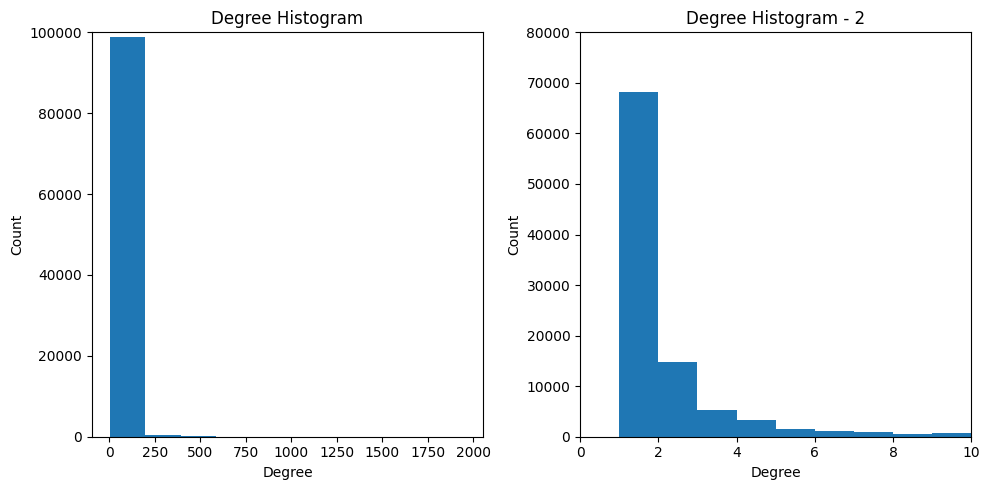

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(10,5))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence, bins = 10)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,100000)

ax[1].set_title("Degree Histogram - 2")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,80000)

plt.tight_layout()
plt.show()

In [ ]:
core = [node for node, drg in dict(g.degree()).items() if drg > 5 ]
degrees = [drg for node, drg in dict(g.degree()).items() if drg > 5 ]

In [ ]:
subg_g = nx.subgraph(g,core)
print(f'Nodes: {len(subg_g)} edges: {nx.number_of_edges(subg_g)}')
nx.write_graphml(subg_g, "neil_graiman_reduced.graphml")

Nodes: 6546 edges: 137606


In [ ]:
import joblib

joblib.dump(g,'graph_full.pkl')

['graph_full.pkl']

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,16))
############# Degree Centrality #############

# layout position
pos = nx.spring_layout(subg_g,seed=42,k=0.25)
# color of nodes
color = list(dict(nx.degree_centrality(subg_g)).values())

# draw edges
nx.draw_networkx_edges(subg_g,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax[0,0])

# draw nodes
nodes = nx.draw_networkx_nodes(subg_g,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax[0,0])

# draw labels
nx.draw_networkx_labels(subg_g, pos=pos,
                        font_color='white',
                        font_size = 5, 
                        ax=ax[0,0])

ax[0,0].axis("off")
plt.colorbar(nodes,ax=ax[0,0])
ax[0,0].set_title('Degree Centrality')

################ Closeness Centrality ####################
color = list(dict(nx.closeness_centrality(subg_g)).values())

# draw edges
nx.draw_networkx_edges(subg_g,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax[0,1])

# draw nodes
nodes = nx.draw_networkx_nodes(subg_g,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax[0,1])

# draw labels
nx.draw_networkx_labels(subg_g, 
                        pos=pos,
                        font_color='white', 
                        font_size = 4,
                        ax=ax[0,1])

ax[0,1].axis("off")
plt.colorbar(nodes,ax=ax[0,1])
ax[0,1].set_title('Closeness Centrality')

############# Betweenness Centrality ##################
color = list(dict(nx.betweenness_centrality(subg_g)).values())

# draw edges
nx.draw_networkx_edges(subg_g,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax[1,0])

# draw nodes
nodes = nx.draw_networkx_nodes(subg_g,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax[1,0])

# draw labels
nx.draw_networkx_labels(subg_g, pos=pos,
                        font_color='white', 
                        font_size = 4,
                        ax=ax[1,0])


ax[1,0].axis("off")
plt.colorbar(nodes,ax=ax[1,0])
ax[1,0].set_title('Betweennes Centrality')

############### Eigenvector Centrality ######################
color = list(dict(nx.eigenvector_centrality(subg_g)).values())

# draw edges
nx.draw_networkx_edges(subg_g,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax[1,1])

# draw nodes
nodes = nx.draw_networkx_nodes(subg_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax[1,1])

# draw labels
nx.draw_networkx_labels(subg_g, 
                        pos=pos,
                        font_color='white', 
                        font_size = 4,
                        ax=ax[1,1])


ax[1,1].axis("off")
plt.colorbar(nodes,ax[1,1])
ax[1,1].set_title('Eigenvector Centrality')

fig.savefig('Centrality_analysis.png', transparent=True,dpi=600)
fig.show()



# plt.axis("off")
# plt.colorbar(nodes)
# plt.savefig('degree_centrality.png', transparent=True,dpi=300)
# plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=84cb924b-f123-4e15-a431-a93b26bbb4e7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>